Problem Statement:  Predict whether a customer will subscribe to a bank’s term deposit.

DOMAIN ANALYSIS

age: age of the customer
job: job of the customer
marital: marital status of the customer
education: customer education level
default: weathe customer has credit default history
housing: weather have housing loan 
loan:  Whether the customer has a personal loan.
contact: type of communication used to contact client
month: month in which last  contacted
day of week: day in which last contacted
duration:duration of last call
campaign: no of times this customer was contacted
pdays:Number of days since the client was last contacted in a previous campaign.
previous: Number of contacts performed before this campaign.
poutcome: Outcome of the previous marketing campaign (success, failure, nonexistent).
emp.var: How much employment changed in the country recently.Positive value → more people got jobs .Negative value → job losses
cons.price: A measure of inflation — how prices of everyday goods are increasing.
cons.conf:Shows how confident people are about the economy and their future financial situation.
euribor3m (3-month Euribor Interest Rate): Interest rate used by European banks when lending money to each other for 3 months.
nr.employed (Number of Employees):Total number of people employed in the country.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

%matplotlib inline
warnings.filterwarnings('ignore')

In [49]:


data = pd.read_csv("bank-additional-full.csv", sep=';')
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [51]:
data.shape

(41188, 21)

In [54]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
data.duplicated().sum()

np.int64(12)

In [57]:
data[data.duplicated()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [58]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

EDA

UNIVARIANT ANALYSIS

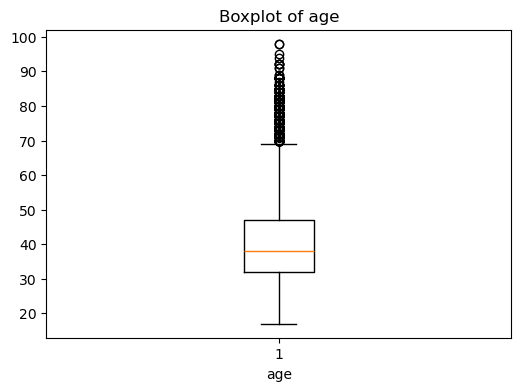

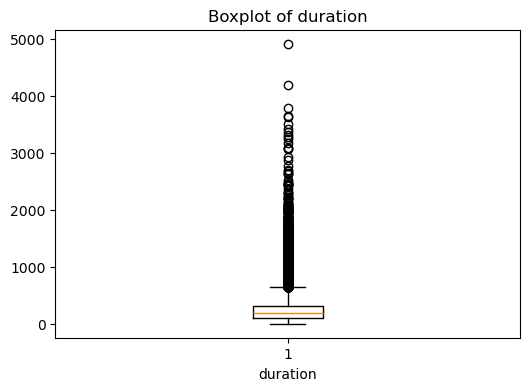

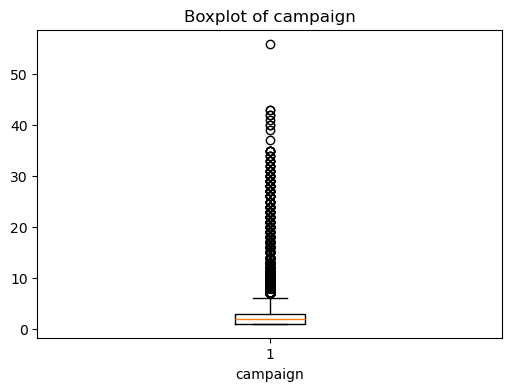

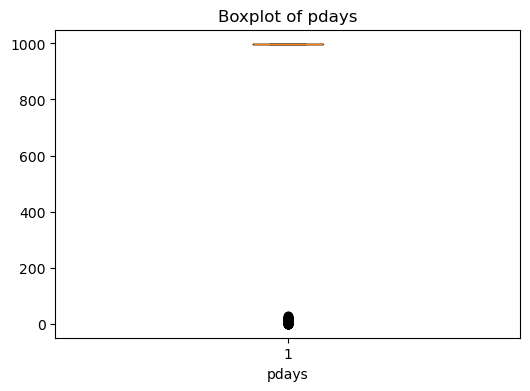

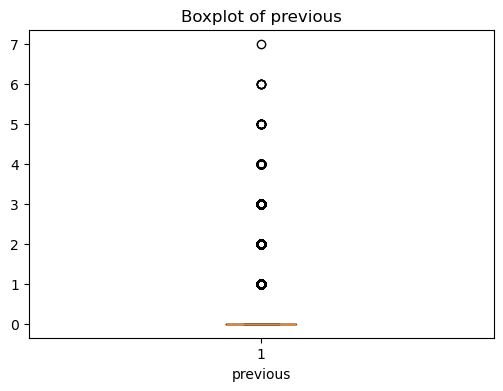

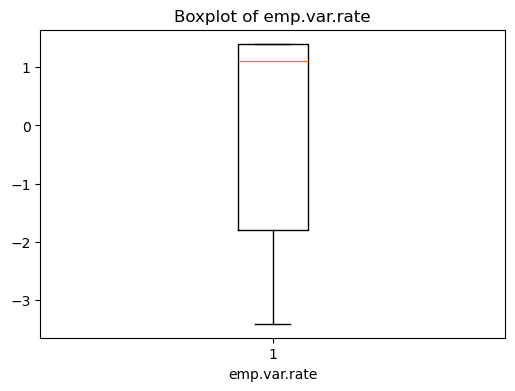

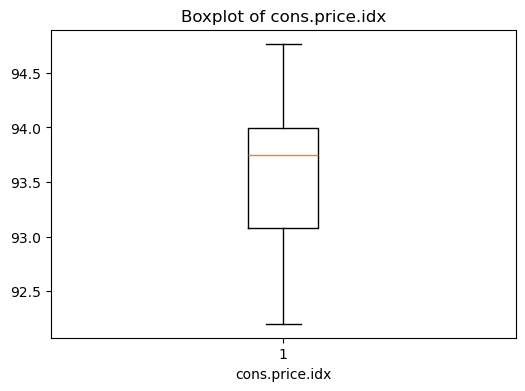

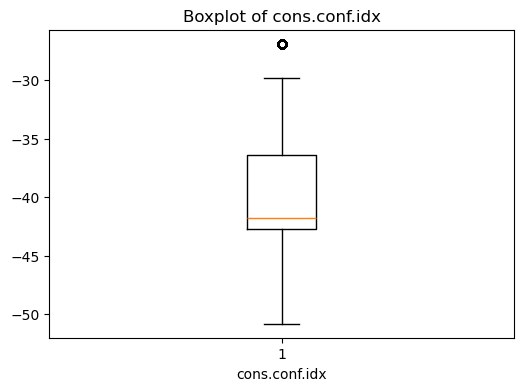

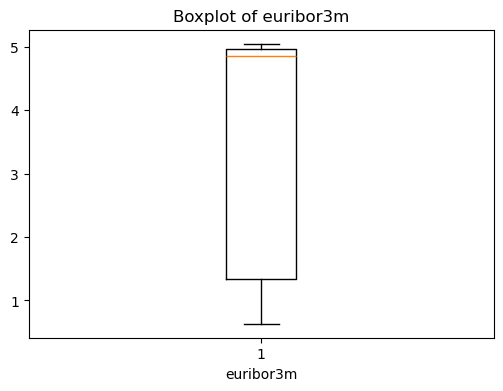

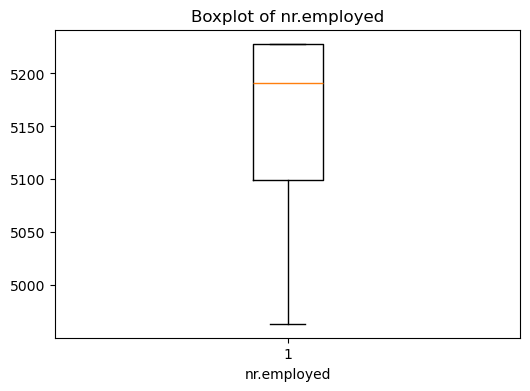

In [59]:
numerical_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

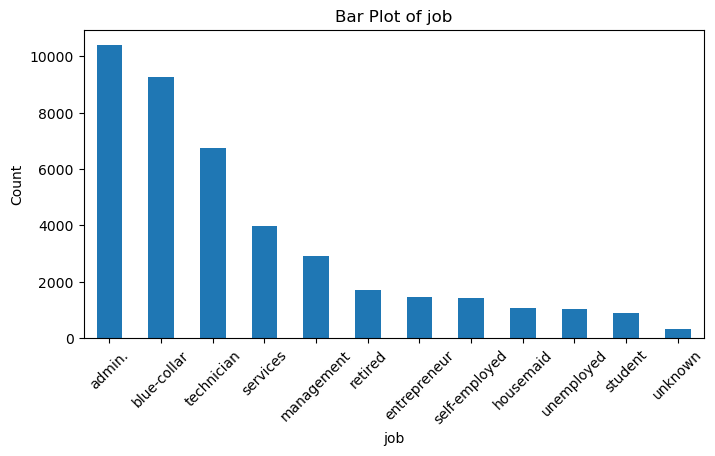

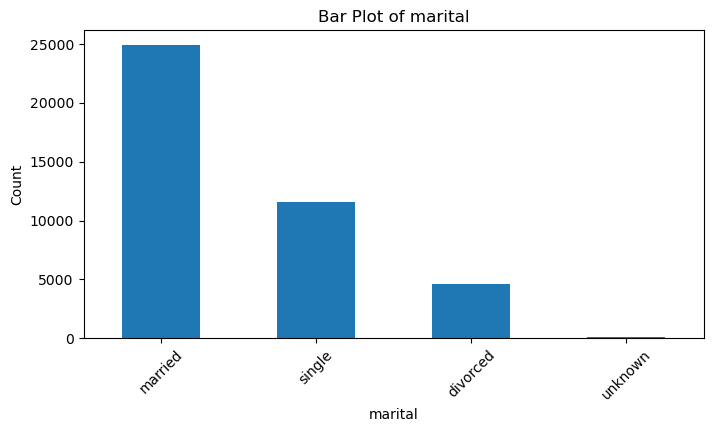

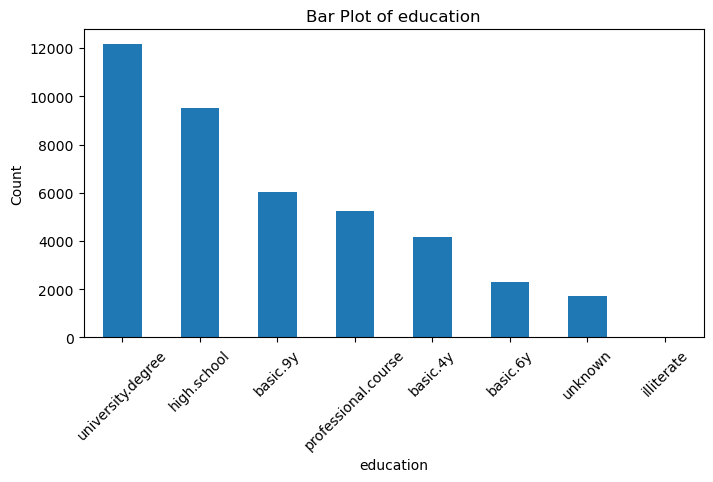

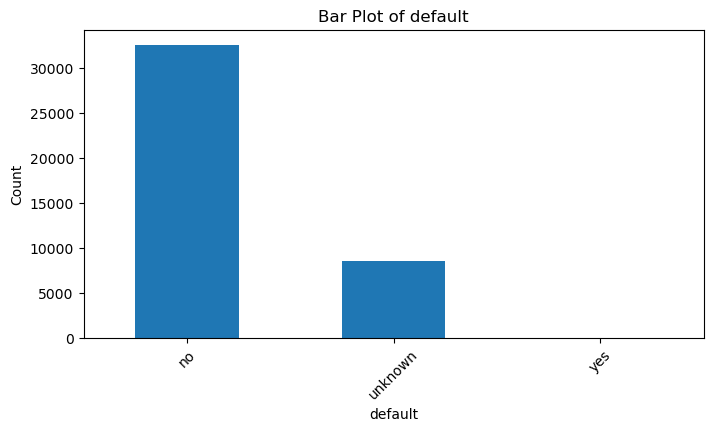

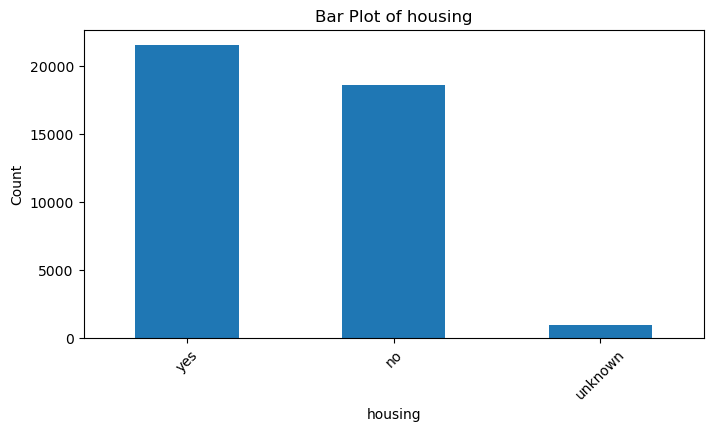

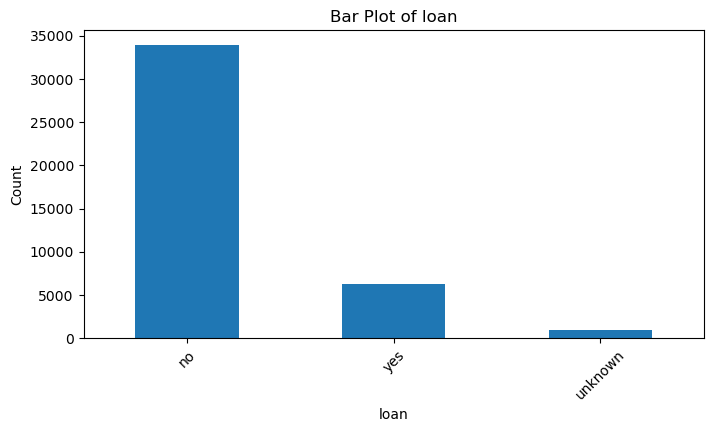

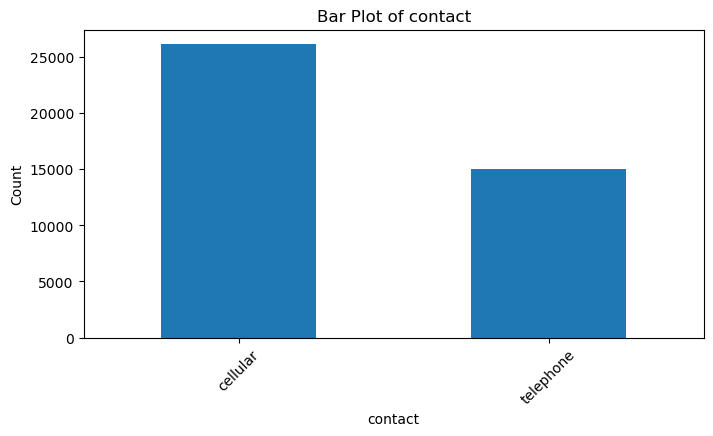

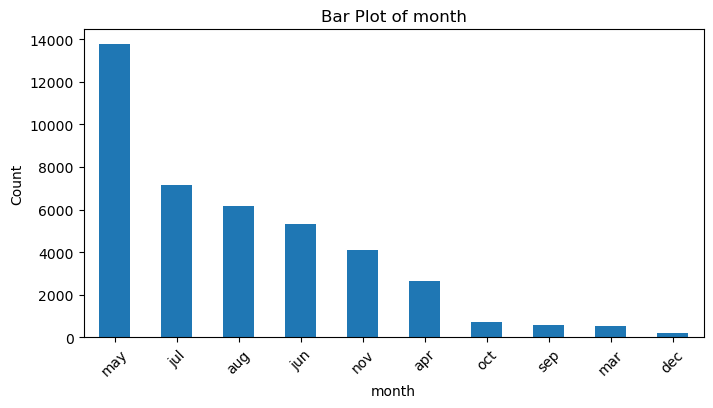

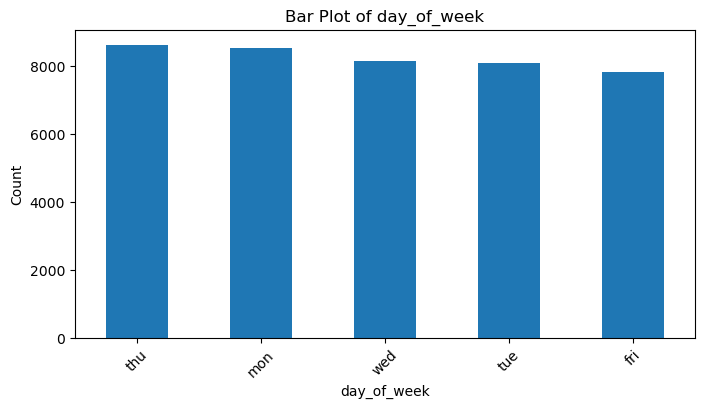

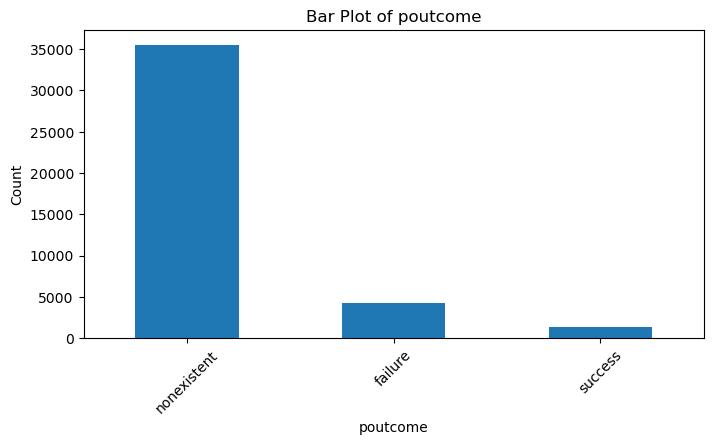

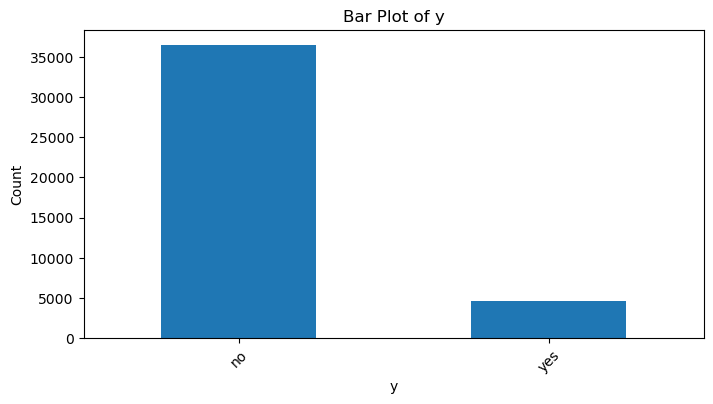

In [60]:
categorical_cols = [col for col in data.columns if col not in numerical_cols]

# Loop through each categorical column and plot bar chart
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

BI-Variant ANALYSIS

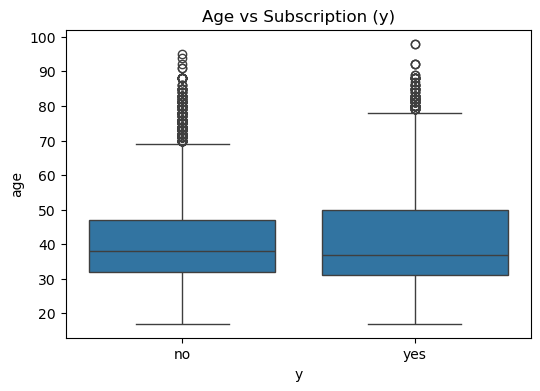

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='age', data=data)
plt.title('Age vs Subscription (y)')
plt.show()


The median age of customers who did not subscribe (“no”) is slightly higher than those who subscribed (“yes”), but the difference is very small.

The age distributions of both groups overlap significantly, indicating that age does not strongly influence subscription decisions.

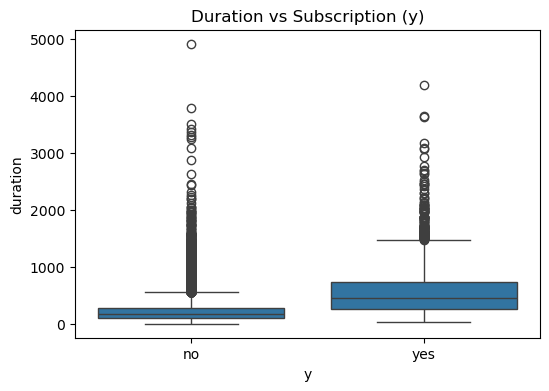

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='duration', data=data)
plt.title('Duration vs Subscription (y)')
plt.show()


Customers who subscribed (“yes”) had significantly longer call durations than those who did not (“no”).

The median duration for the “yes” group is much higher, and the entire distribution is shifted upward, showing that longer and more engaged conversations are strongly associated with successful subscriptions.

A large number of long-duration outliers belong to the “yes” category, reinforcing the link between longer calls and higher conversion rates.

However, since call duration is only known after the call ends, it acts as a leakage feature and should not be used for model training.

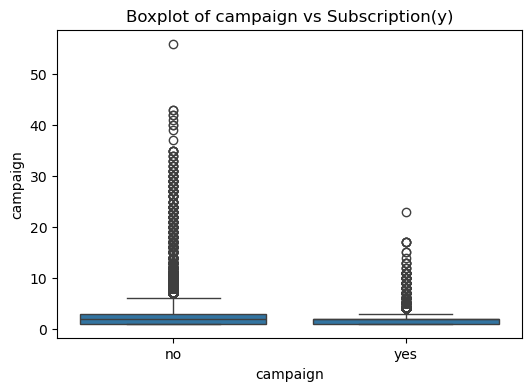

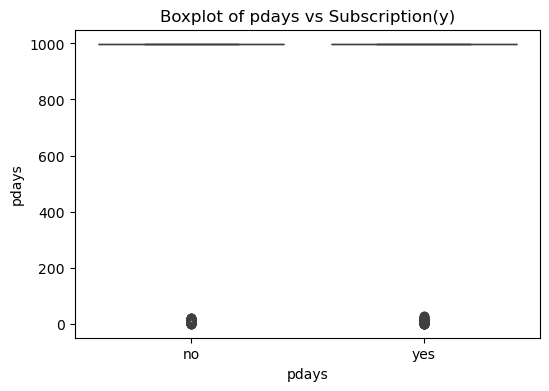

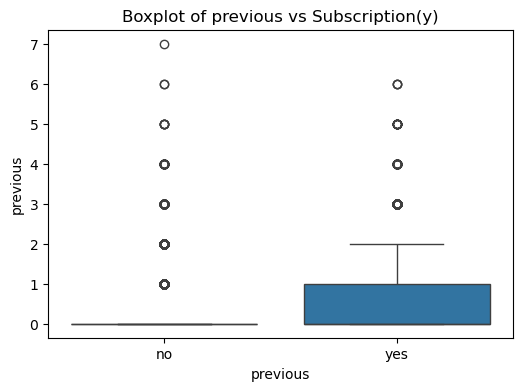

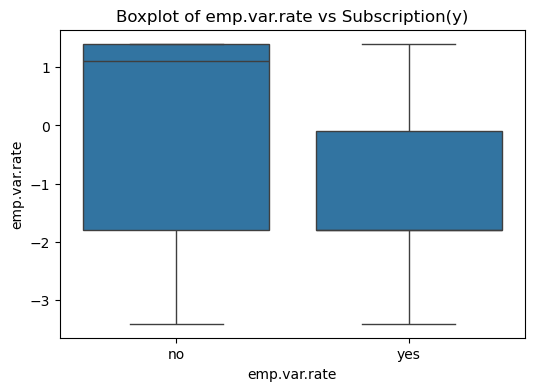

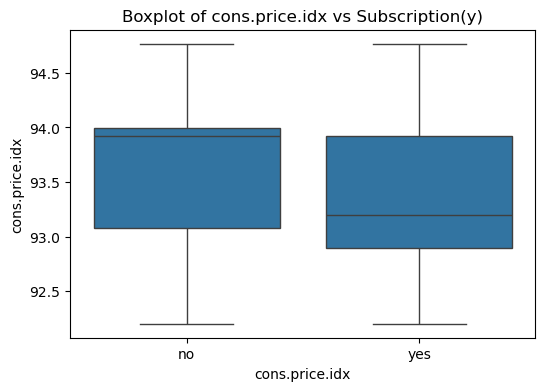

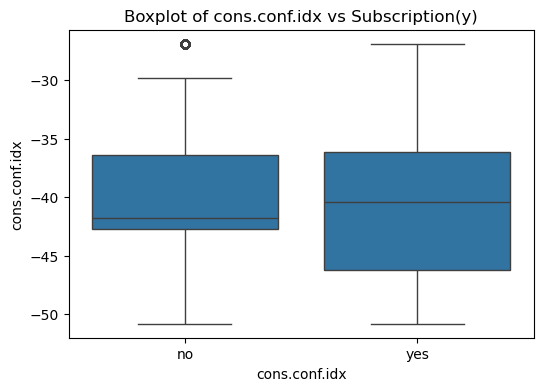

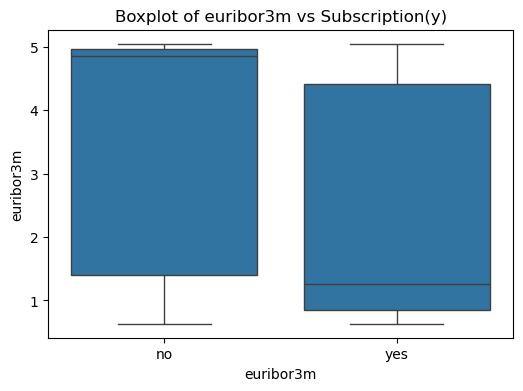

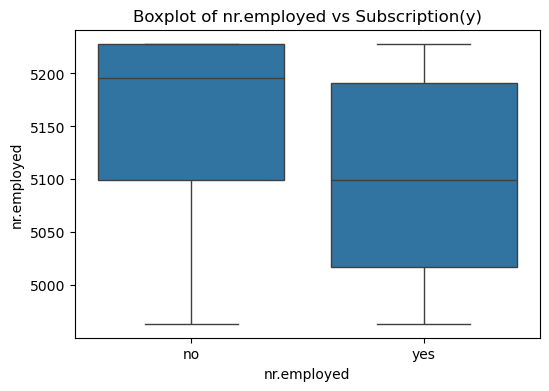

In [63]:
numerical_cols = ['campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x= 'y',y=data[col],data=data )
    plt.title(f'Boxplot of {col} vs Subscription(y)')
    plt.xlabel(col)
    plt.show()

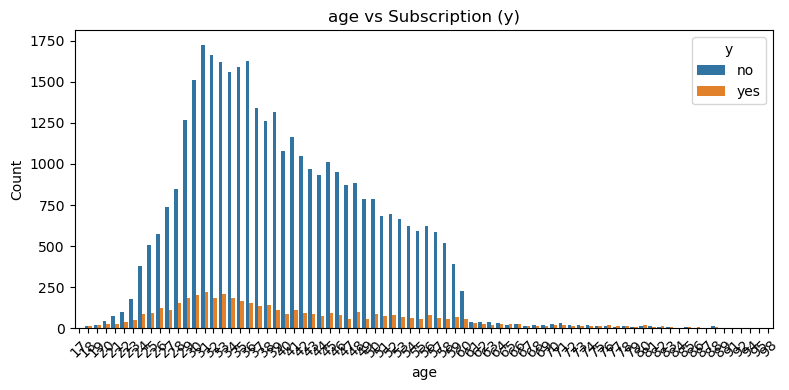

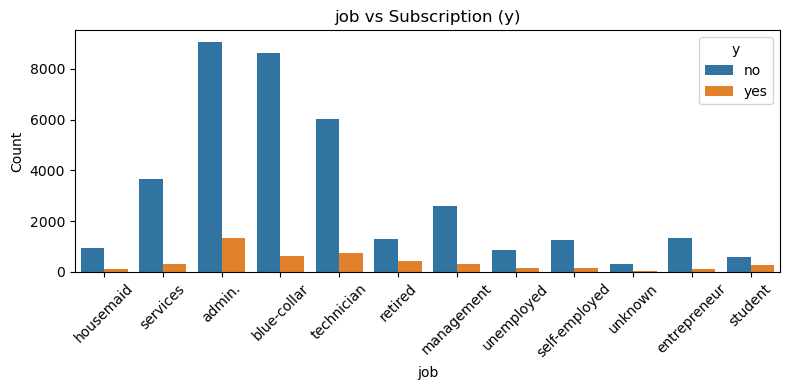

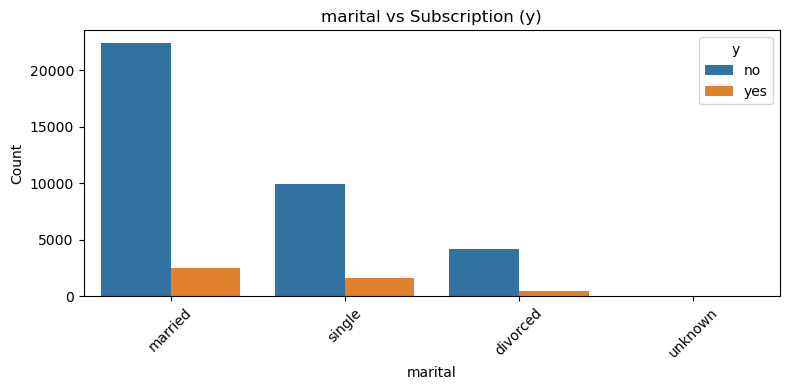

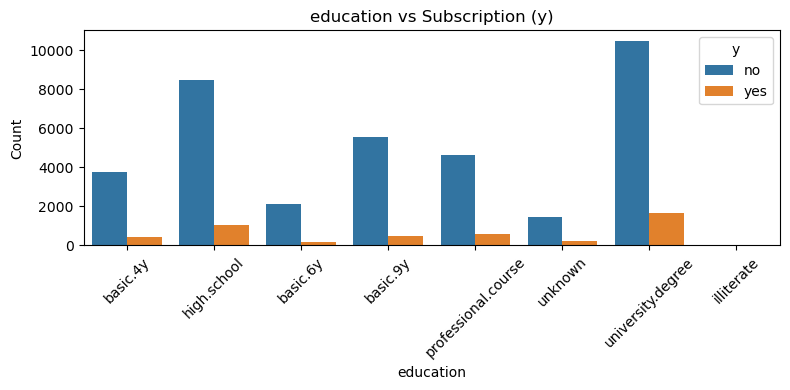

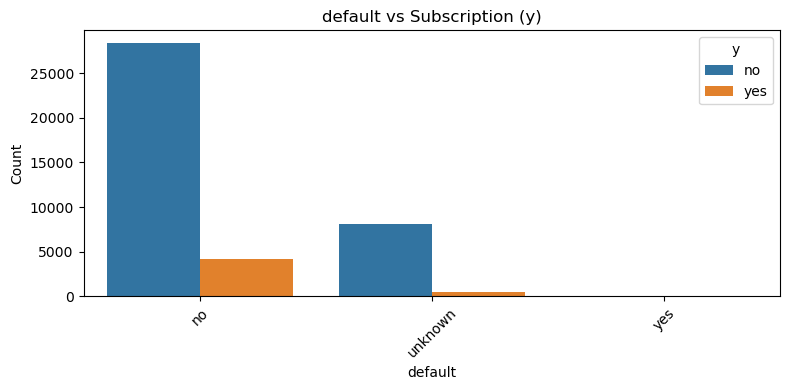

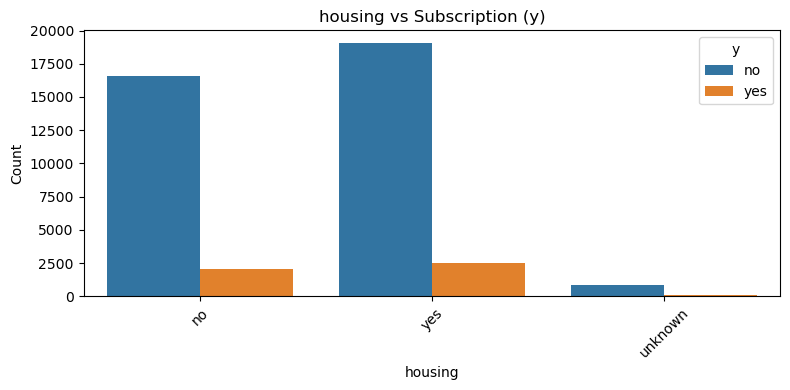

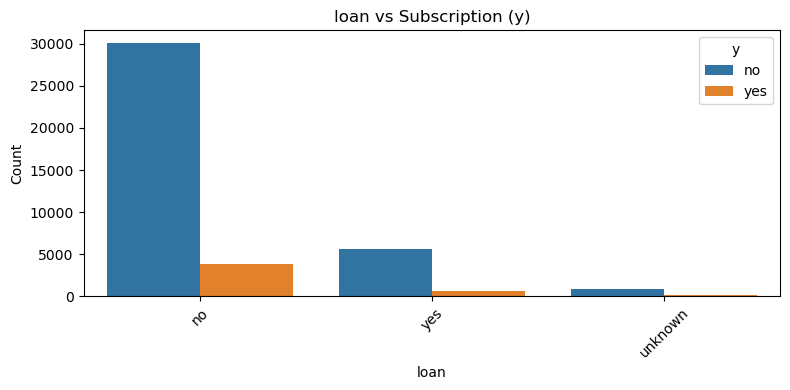

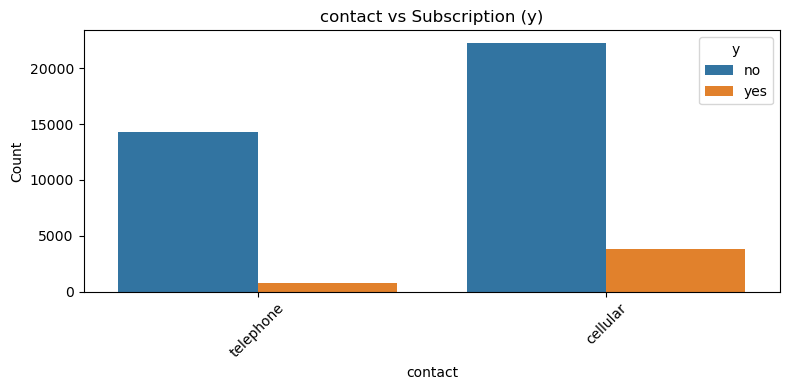

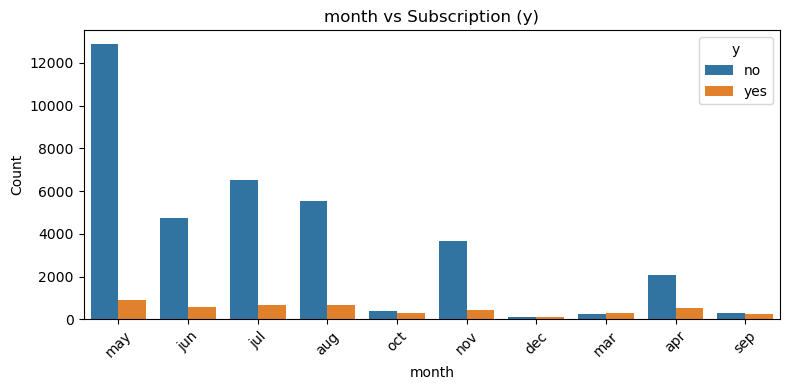

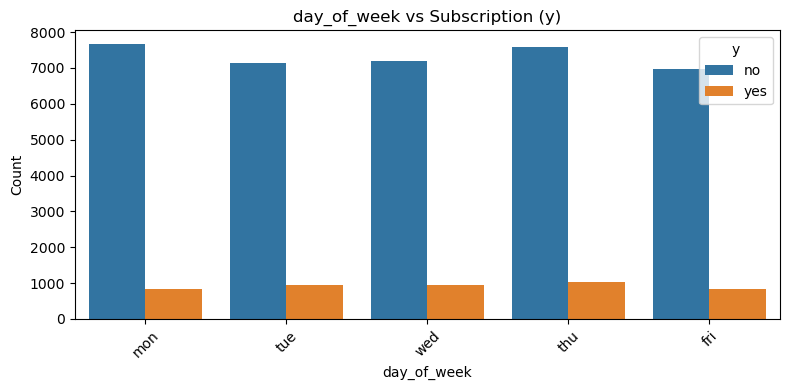

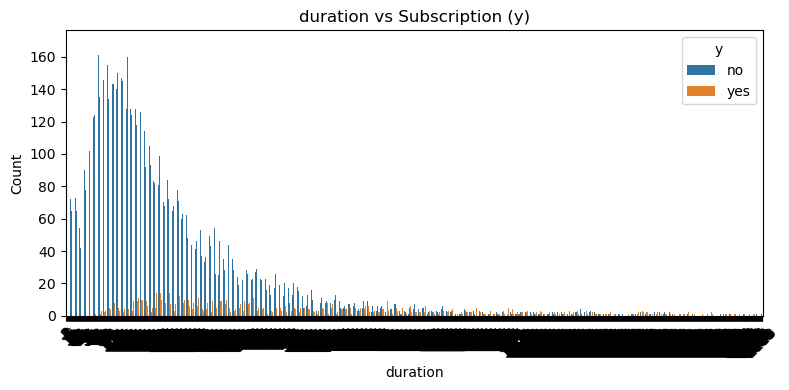

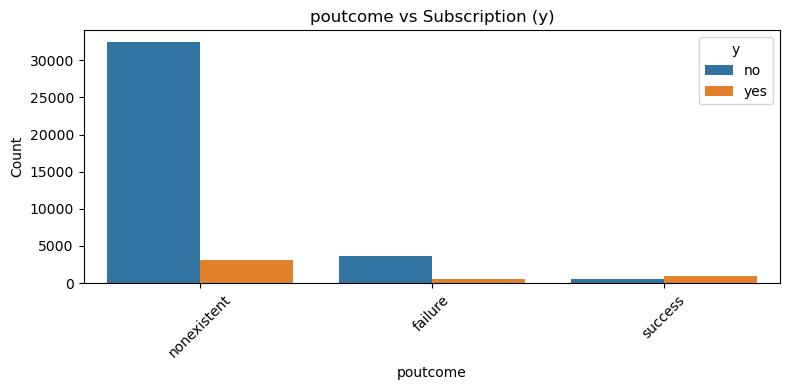

In [64]:
categorical_cols = [col for col in data.columns 
                    if col not in numerical_cols + ['y']]  # remove target from list

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col, hue='y')
    plt.title(f'{col} vs Subscription (y)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Correlation HeatMap

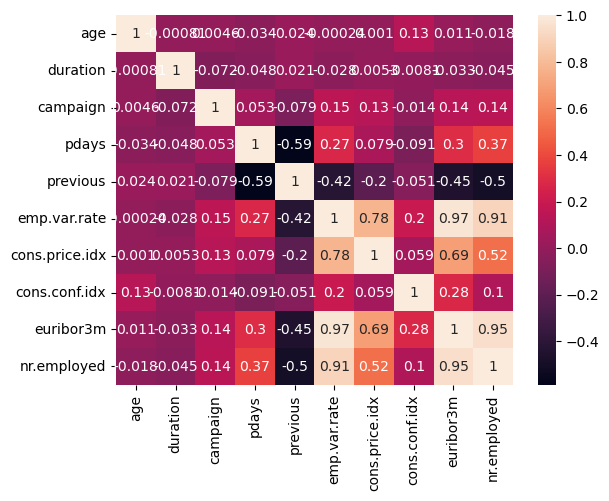

In [65]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


1. Most numerical variables (age, duration, campaign, pdays, previous) show very low correlation with each other, indicating low multicollinearity.
2. Economic indicators like emp.var.rate, euribor3m, and nr.employed have very strong positive correlations (0.91–0.97), meaning they track similar economic behavior.
3. cons.price.idx shows moderate positive correlation with euribor3m (0.69) and nr.employed (0.52), indicating economic conditions influence    employment and interest rates.
4. pdays and previous have a strong negative correlation (–0.59), meaning clients contacted long ago typically have fewer previous contacts.
5. These correlations help identify redundant variables for modeling — some economic variables may be removed or reduced to avoid multicollinearity.

DATA PREPROCESSING

In [66]:
(data == 'unknown').sum()


age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

So here job,marital  low unknown so we can replace it with mode .
Education,default,housing,loan and all have moderate to hign unknown so we can leave it as unknown itseld because if  its replaced by mode then model may be biased.

In [67]:
# Replace low-percentage unknowns
data['job'] = data['job'].replace('unknown', data['job'].mode()[0])
data['marital'] = data['marital'].replace('unknown', data['marital'].mode()[0])


In [68]:
(data == 'unknown').sum()


age                  0
job                  0
marital              0
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])


In [70]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [71]:
data.drop("duration", axis=1, inplace=True)


In [72]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [73]:
OHE_columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
standard_scaler=['age','campaign','pdays','previous',
                'emp.var.rate','cons.price.idx','cons.conf.idx',
                'euribor3m','nr.employed']


In [74]:
preprocessor=ColumnTransformer([("OHE columns",OneHotEncoder(),OHE_columns),
                                ("standard_scaler",StandardScaler(),standard_scaler)])


In [75]:
preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome']),
                                ('standard_scaler', StandardScaler(),
                                 ['age', 'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed'])])

In [76]:
X = data.drop(columns=["y"])
y = data["y"]

In [77]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [78]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

Pipeline Creation

In [79]:
data['y'].value_counts()


y
0    36537
1     4639
Name: count, dtype: int64

From this we will understand that there is data imbakance then no category is extremely high value so this causes false predictions in the model so we apply smote

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline


In [82]:

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),   # OHE + Scaling
    ("smote", SMOTE(random_state=42)),  # ONLY train data
    ("model", LogisticRegression(max_iter=2000))
])

In [83]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('OHE columns',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=2000))])

In [84]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('OHE columns',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=2000))])

In [85]:
y_predict = pipe.predict(X_test)

In [86]:
y_predict

array([1, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_predict))

0.8186012627489072


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[6127 1138]
 [ 356  615]]


In [88]:
pd.crosstab(y_test,y_predict)

col_0,0,1
y,,
0,6127,1138
1,356,615


In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8186012627489072
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      7265
           1       0.35      0.63      0.45       971

    accuracy                           0.82      8236
   macro avg       0.65      0.74      0.67      8236
weighted avg       0.88      0.82      0.84      8236

Confusion Matrix:
 [[6127 1138]
 [ 356  615]]


Here we give more importance to Recall because False Negative give a missed customer as we predict it as not subscribed but actually subscirbed. Precision also comes to account as when precision is high calling a lot of people will affetc budget .

RANDOM FOREST

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),   # OHE + Scaling
    ("smote", SMOTE(random_state=42)),  # ONLY train data
    ("model", RandomForestClassifier(n_estimators=200,
        random_state=42,
        class_weight="balanced"))
])

In [92]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('OHE columns',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [93]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('OHE columns',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [94]:
y_predict=pipe.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8814958717824186
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7265
           1       0.50      0.34      0.40       971

    accuracy                           0.88      8236
   macro avg       0.71      0.65      0.67      8236
weighted avg       0.87      0.88      0.87      8236

Confusion Matrix:
 [[6932  333]
 [ 643  328]]


Although Random Forest achieved higher accuracy, it showed significantly lower recall for subscribed customers. Since the business objective is to identify as many potential subscribers as possible, recall is prioritized over accuracy. Therefore, Logistic Regression performs better for this problem.

XGBOOST

In [97]:
from xgboost import XGBClassifier


In [98]:
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),   # OHE + Scaling
    ("smote", SMOTE(random_state=42)),  # ONLY train data
    ("model", XGBClassifier(n_estimators=200,
        random_state=42,
        class_weight="balanced"))
])

In [99]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('OHE columns',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('smo...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None, ...))])

In [100]:
y_predict=pipe.predict(X_test)

In [101]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8921806702282662
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7265
           1       0.58      0.30      0.40       971

    accuracy                           0.89      8236
   macro avg       0.75      0.64      0.67      8236
weighted avg       0.87      0.89      0.88      8236

Confusion Matrix:
 [[7053  212]
 [ 676  295]]


Although XGBoost achieved higher accuracy, Logistic Regression provided significantly higher recall for subscribers, making it more suitable for marketing campaigns where missing potential customers is costly.”
